# The building blocks

In this course we will be mainly concerned with the study of many-body quantum systems, systems made by many copies of individual consituentes.  Say e.g. spins $s=\frac{1}{2}$. 

## Single spin
In this specific case the states of a single constituent span a two dimensional complex Hilbert space. We can thus use a vector with two complex components
$|\phi\rangle = c_0 |0\rangle + c_1 |1\rangle$

The aim of this notebok is to understand how tow pass from the theory to the practical implementation of the numerical study of such systems. We will use python and the numpy package to do so.
The full documentation is available online at https://numpy.org/doc/stable/.


### E1 Random state
We start by creating a random state of a single spin one half.
Write a python code that uses the numpy random generator in order to create a random state of a spin one half. Store it as a column vector. 
You can use the np.random.rand function to create random numbers.

In [87]:
import numpy as np

# Create a random state of a single spin 1/2
state = np.random.rand(2, 1) + 1j * np.random.rand(2, 1)
print(state)

[[0.09074074+0.47729405j]
 [0.93623321+0.93999673j]]


### E2 Normalize your state
In QM states are usually normalized, normalize the state you have created previously:
$\langle \phi|\phi\rangle =1$

(*Hint: use the numpy linalg norm function*) https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [88]:
print("Norm of the state before normalization:", np.linalg.norm(state))
state = state / np.linalg.norm(state)  # Normalize the state
print("Norm of the state after normalization:", np.linalg.norm(state))

Norm of the state before normalization: 1.41285878692723
Norm of the state after normalization: 1.0


## Defining operators 
Once we have a state we can compute expectation value of operators. Remember operators need to be Hermitian. 
All Hermitian operators can be written as linear combinations of the basis of Hermitian operators. For a single spin 1/2 there are 4 operators in the basis $ 1\equiv \sigma_0, \sigma_x \equiv \sigma_1, \sigma_y \equiv \sigma_2, \sigma_z \equiv \sigma_3$.
They satisfy the algebra
$\sigma_i \sigma_j = \delta_{ij}+i \epsilon_{ijk}\sigma_k$

with $\epsilon_{ijk}$ the completely antisymmetric tensor with $\epsilon_{012}=1$
(In this notation summation over repeated indices is implied, called Einstein notation)

Define the Pauli matrices as numpy arrays. You can use np.array to define them.



In [89]:
identity = np.eye(2)
sigma_x = np.array([[0.,1.],[1.,0.]])
sigma_y = np.array([[0.,-1.j],[1.j,0.]])
sigma_z = np.array([[1.,0.],[0.,-1.]])
print(identity)
print(sigma_x)
print(sigma_y)
print(sigma_z)
print(sigma_x@sigma_y)

[[1. 0.]
 [0. 1.]]
[[0. 1.]
 [1. 0.]]
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
[[ 1.  0.]
 [ 0. -1.]]
[[0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j]]


 ### E3 Construct operators from elements of the basis
 Write an arbitrary operator linear combination of the four above four opeartors using four complex random   coefficients
$O = c_0 1 + c_i \sigma_i$, normalize it in such a way that 
$c_i c_i^*=1$
 

In [90]:
c = np.random.rand(4)
c = c / np.linalg.norm(c)  # Normalize the coefficients
print(c)
operator = c[0]*identity + c[1]*sigma_x + c[2]*sigma_y + c[3]*sigma_z
print(operator)

[0.58000034 0.63899504 0.50149051 0.06158099]
[[0.64158132+0.j         0.63899504-0.50149051j]
 [0.63899504+0.50149051j 0.51841935+0.j        ]]


### E4 Find the components in a given basis
Now from the kownledge of the operator $O$, reconstruct its components in the basis of the above operators. 

(*Hint: use the fact that Pauli operators are traceless, and they square to the identity*)

In [91]:
coef =np.zeros([4,1])+1j*np.zeros([4,1])
coef[0] = np.trace(operator@identity)/2
coef[1] = np.trace(operator@sigma_x)/2
coef[2] = np.trace(operator@sigma_y)/2
coef[3] = np.trace(operator@sigma_z)/2
print(coef)

[[0.58000034+0.j]
 [0.63899504+0.j]
 [0.50149051+0.j]
 [0.06158099+0.j]]


### E5 Check Hermiticity of the operator
Since we are interested in observable we want the operator to be Hermitian, check that your operator is indeed Hermitian.

you can use the numpy conjugate transpose function np.conj().T  to generate the Hermitian operator and check that all elements are close to the one of the original operator.

In [92]:
np.isclose(operator,operator.T.conj())

array([[ True,  True],
       [ True,  True]])

### E6 Computing expectation values

Given the state $|\phi \rangle$ and the operator $O$, compute the expectation value $\langle \phi |O|\phi \rangle$, assuming a normalized state, in python, you can use the @ operator to perform matrix multiplications. 

In [93]:
exp_val = state.T.conj() @ operator @ state
print(exp_val)

[[0.69294289+0.j]]


### E7 Changing basis to states and operators
We can clearly change the basis to operators and states, for example we can re-express the above state and operator in the basis where $\sigma_x$ is diagonal, and the matrix element of the new operator in the new state should be the same than the old one in the old state.

Define the U_x matrix that changes basis from the computational basis to the $\sigma_x$ basis, use it to change basis of both the state and the operator and compute again the expectation value, check that it is the same as before.

In [94]:
U_x =np.array([[1,1],[1,-1]])/np.sqrt(2)
print( U_x.T @ sigma_x @ U_x )
state_x =U_x.T @ state
operator_x = U_x.T @ operator @ U_x
print(state_x.T.conj()@operator_x@state_x)

[[ 1.00000000e+00 -2.23711432e-17]
 [ 2.23711432e-17 -1.00000000e+00]]
[[0.69294289+0.j]]


## Two spins

Once we have defined states and operators for a single spin, we can easily extend the formalism to many spins using the tensor product.
Here we have two different types of random states. A random state of two spins built from the random state of a single spin $|\phi \phi\rangle =| \phi\rangle \otimes  |\phi\rangle$, construct it below (*Hint: use the np.kron() function)

In [95]:
def random_state(spin=1/2):
    dim = int(2*spin+1)
    state = np.random.rand(dim, 1) + 1j * np.random.rand(dim, 1)
    return state / np.linalg.norm(state)  # Normalize the state

In [118]:
state_1 = random_state()
print("State 1:", state_1)
state_2 = random_state()
print("State 2:", state_2)

two_spin_state = np.kron(state_1, state_2)
print("Two-spin state:", two_spin_state)

State 1: [[0.8026092 +0.04877335j]
 [0.43089967+0.40959138j]]
State 2: [[0.32256624+0.04754253j]
 [0.6739209 +0.66296406j]]
Two-spin state: [[0.25657582+0.05389071j]
 [0.50856014+0.56497044j]
 [0.11952067+0.15260641j]
 [0.01884793+0.56170319j]]


Now we can compute the expectation value of different operators, for example we can compute the old operator on the first spin, and we should get the same number out $O \otimes 1$. notice that this is correct since we are dealing with product states. Check it numerically below.

In [ ]:
exp_val_1 = state_1.T.conj() @ operator @ state_1
print("Expectation value for state 1:", exp_val_1)

operator_and_identity = np.kron(operator, identity)
exp_val_2 = two_spin_state.T.conj() @ operator_and_identity @ two_spin_state
print("Expectation value for two-spin state:", exp_val_2)

Expectation value for state 1: [[1.37420958+0.j]]
Expectation value for two-spin state: [[1.37420958+5.55111512e-17j]]


But we can also compute the same operator on the other spin, $1 \otimes O$, and the result is different. Check it numerically below.

In [122]:
exp_val_1 = state_2.T.conj() @ operator @ state_2
print("Expectation value for state 2:", exp_val_1)

identity_and_operator = np.kron(identity, operator)
exp_val_2 = two_spin_state.T.conj() @ identity_and_operator @ two_spin_state
print("Expectation value for two-spin state with operator on second spin:", exp_val_2)

Expectation value for state 2: [[1.03196022+0.j]]
Expectation value for two-spin state with operator on second spin: [[1.03196022+0.j]]


We can now write  multi-spin operators $O \otimes O$ and their combinations, try it with the operator you have defined before.

In [123]:
operator_and_operator = np.kron(operator, operator)
exp_val = two_spin_state.T.conj() @ operator_and_operator @ two_spin_state
print(exp_val)

[[1.41812961+5.55111512e-17j]]


### The cost of increasing the number of spins. 
We can now try to understand what is the cost of increasing the number of spins. From the computational point of view there are two kinds of cost. One is the cost of storing the state of the system in memory, typically called the *space* cost, the other is the cost entailed with performing the computation, typically called the *time* cost. 
You have learnt about these aspects in the lecture notes, here we take a pragramatic approach. 
We will first plot the cost *space* cost as a function of the number of constituents. 
In order to do so we will create random states of N spins, and we will check how much memory they occupy. The states are product states of N random single spin states, however for the purpose of this exercise this does not matter, since uisng kron we explcitly create the full state.
In order to check the memory occupied by a numpy array you can use the nbytes attribute of the array or np.size function.

Compute the memory occupied by random states of N spins, with N ranging from 1 to 10, and plot the result in a log scale. What do you observe?

Plots are produced using the matplotlib package, full documentation is available online at https://matplotlib.org/stable/contents.html.


In [125]:
import matplotlib.pyplot as plt

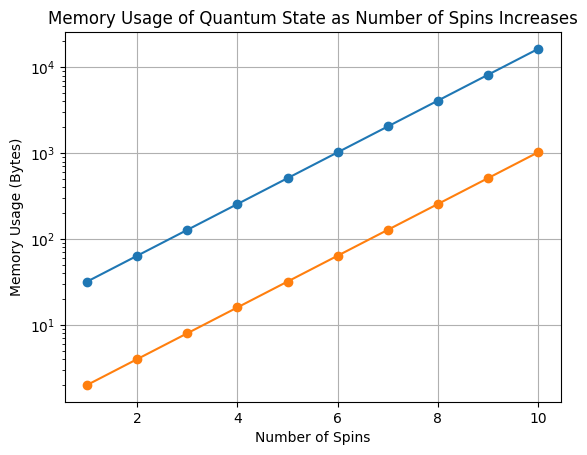

In [132]:
num_spins = [i for i in range(1, 11)]
space_cost_bytes = []
space_cost_size = []

for n in num_spins:
    state = [random_state() for _ in range(n)]
    total_state = state[0]
    for i in range(1, n):
        total_state = np.kron(total_state, state[i])

    space_cost_bytes.append(total_state.nbytes)
    space_cost_size.append(np.size(total_state))

plt.plot(num_spins, space_cost_bytes, marker='o')
plt.plot(num_spins, space_cost_size, marker='o')
plt.yscale('log')
plt.xlabel('Number of Spins')
plt.ylabel('Memory Usage (Bytes)')
plt.title('Memory Usage of Quantum State as Number of Spins Increases')
plt.grid()
plt.show()

We can also now compute the time it takes to compute the expectation value of a given observable,
as a function of the number of spins.
We can use the time package to measure the time it takes to perform a given operation.
Documentation is available online at https://docs.python.org/3/library/time.html.
Here you need to both generate the random state and the operator

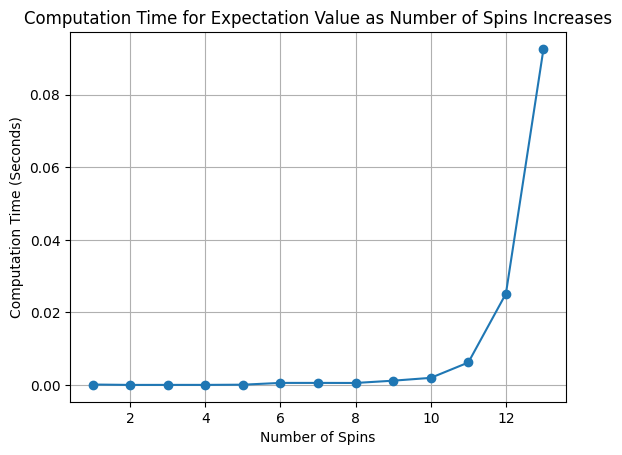

In [140]:
import time

num_spins = [i for i in range(1, 14)]
computation_time = []

for n in num_spins:
    state = [random_state() for _ in range(n)]
    total_state = state[0]
    for i in range(1, n):
        total_state = np.kron(total_state, state[i])
    
    total_operator = operator
    for i in range(1, n):
        total_operator = np.kron(total_operator, identity)

    start_time = time.time()
    exp_val = total_state.T.conj() @ total_operator @ total_state
    end_time = time.time()

    computation_time.append(end_time - start_time)

plt.plot(num_spins, computation_time, marker='o')
plt.xlabel('Number of Spins')
plt.ylabel('Computation Time (Seconds)')
plt.title('Computation Time for Expectation Value as Number of Spins Increases')
plt.grid()
plt.show()

### Our first tensor network
We have not used at all the fact that the sates we are dealing with are very special, in the sense that they are product state. In order to see this we can compute the connected correlation functions, that is the value of

$\langle O_1 O_2 \rangle -\langle O_1\rangle \langle O_2\rangle$, we do it for the case of three spins, for simplicity, 
Check that the result is zero, as expected for product states.



In [ ]:
total_state = np.kron(random_state(), np.kron(random_state(), random_state()))

print( total_state.conj().T @ np.kron(operator, np.kron(operator, identity)) @ total_state )
print( total_state.conj().T @ operator_1 @ total_state * total_state.conj().T @ operator_2 @ total_state )

[[0.57388896+0.j]]
[[0.57388896+0.j]]


As seen in the previous explicit example that value always vanishes, as a consequence of the structure of the state.
As a result
$⟨𝑂_1𝑂_2⟩=⟨𝑂_1⟩⟨𝑂_2⟩$ for product states, leading to a huge simplification. Indeed we can now compute any arbitrary correlation function or operator by just multiplying the values of local operators. Rather than explicitly building our large tensor product state, we can just keep a list of individual product states, and use it to compute expectation values.

With respect to expectation of local operators these states always like pure state 
$\rho =|\phi\rangle\langle \phi|$,
such that local expectation values are given as expected as 
$\langle O \rangle = \textrm{tr}(\rho O) =\langle \phi |O |\phi \rangle$


## The generic multi-spin state
We also have the case of a generic random state of the two spins. How do we get it? We can evolve any initial state of the Hilbert space of the two spins under the action of a random Hamiltonian for unit time. The only request is that the Hamiltonian is Hermitian, so rather than following the ideas of the previous section we just build a random $2^N \times 2^N$ Hamiltonian, that is extensive and build the corresponding state.

In order to build the evolution operator $U = e^{-i H}$ we can use the scipy.linalg expm function, documentation is available online at https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html.
Write a python code that builds such a random state for two spins and computes the expectation value of the operator $O \otimes O$ on it.

Check what happens to the connected correlation function in this case.




In [145]:
import scipy as sp

In [159]:
def correlated_function(state):
    exp_1 = state.T.conj() @ np.kron(operator, np.eye(2)) @ state
    exp_2 = state.T.conj() @ np.kron(np.eye(2), operator) @ state
    exp_12 = state.T.conj() @ np.kron(operator, operator) @ state
    return exp_12 - exp_1 * exp_2

In [160]:
def hamiltonian(N):
    dim = 2**N
    random_h = np.array(np.random.rand(dim,dim)+1j*np.random.rand(dim,dim))
    random_h = random_h+random_h.T.conj()
    random_h = random_h/np.linalg.norm(random_h)
    return random_h

c:\Users\marlo\Desktop\Tensor_network_course\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\marlo\Desktop\Tensor_network_course\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


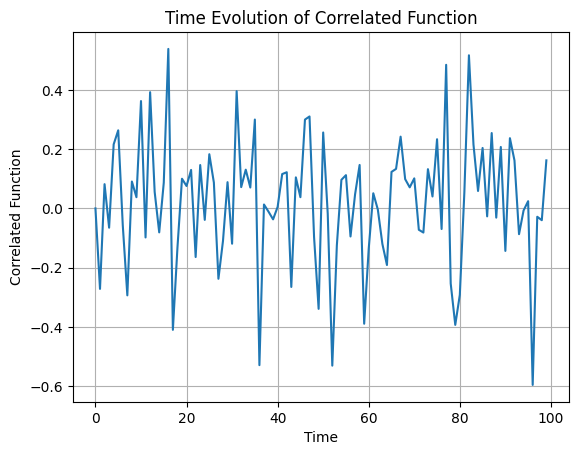

In [161]:
N = 2
dim = 2**N
H = hamiltonian(N)
state = [1, 0, 0, 0]  # Initial state |00>

results = []

for t in range(100):
    state = sp.linalg.expm(-1j*H*t) @ state
    results.append( correlated_function(state) )

plt.plot(results)
plt.xlabel('Time')
plt.ylabel('Correlated Function')
plt.title('Time Evolution of Correlated Function')
plt.grid()
plt.show()

At last we can consider more than two spins. 
Generate the random state using the above strategy for $N$ spins, compute the entanglement entropy of half of the system.
Plot is a function of N, for N ranging from 2 to 10.
What do you observe?
Notice that given we are using random states, you should average over different realizations of the random state to get a meaningful result.
Plot the average value and the standard deviation as error bars in order to have a feeling of the fluctuations.

2
4
6
8


Text(0, 0.5, 'S')

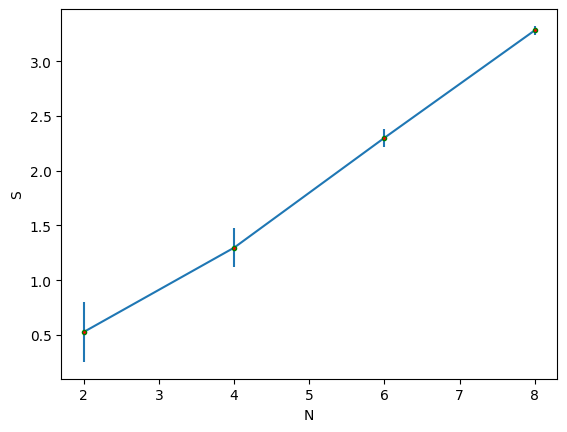

In [ ]:
mean_ent=[]
std_ent=[]

for N in range(2,10,2):
    print(N)
    dim_h =2**N
    ent_entropies=[]
    #print(dim_h)

    # Es fan 100 rondes per a tenir estadística
    for _ in range(0,100):

        # Es genera un estat simple amb tots els espins a l'estat fonamental: |00..0>
        init_state = np.zeros([dim_h,1])
        init_state[0]=1.

        # Es crea un hamiltonià aleatori (hermític)
        random_h = np.array(np.random.rand(dim_h,dim_h)+1j*np.random.rand(dim_h,dim_h))
        random_h = random_h+random_h.T.conj()
        random_h = random_h/np.linalg.norm(random_h)

        # S'evoluciona l'estat amb el hamiltonià per un temps t = N**4, creant un estat entrellaçat
        random_unitary =sp.linalg.expm(-N**4*1j*random_h)
        random_state=random_unitary@init_state
        #print(np.linalg.norm(random_state))

        # Es calcula l'espectre de Schmidt: ent_spectrum = singular values of the square root of the reduced density matrix
        sqrt_reduced_density_matrix = np.reshape(random_state,[int(2**(N/2)),int(2**(N/2))])
        _, ent_spectrum,_= sp.linalg.svd(sqrt_reduced_density_matrix)
        #print(np.sum(ent_spectrum**2))

        # Càlcul de l'entropia d'entrellaçament: S = -sum(ent_spectrum**2 * log(ent_spectrum**2))
        ent_entropy = -np.dot(np.log(ent_spectrum**2),ent_spectrum**2)/np.log(2)
        ent_entropies.append(ent_entropy)
    
    mean_ent.append(np.mean(ent_entropies))  
    std_ent.append(np.std(ent_entropies))
    #plt.plot(ent_entropies)

plt.errorbar( range(2,10,2), mean_ent,std_ent,marker='o', mfc='red',
         mec='green', ms=3, mew=1)
plt.xlabel('N')
plt.ylabel('S')
    #plt.ylabel('Entanglement bi-partition')
    #plt.xlabel('Realization')
    #plt.ylabel('Entanglement bi-partition')

At the end of this notebook you should be able to understand how to build states and operators for many-body quantum systems, and how to compute expectation values of operators on such states.
You should also be able to understand the difference between product states and generic entangled states, and how this reflects in the computation of expectation values of operators.
What is the entanglement entropy of half of a random state of N spins, as a function of N?